In [44]:
# open excel file
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/participant_survey.xlsx')
df = df.loc[:, ~df.columns.str.startswith('Points')]
df = df.loc[:, ~df.columns.str.startswith('Feedback')]
df.drop(['Start time', 'Completion time', 'Email', 'Name', 'Total points', 'Quiz feedback'], axis=1, inplace=True)
# set id to index
df.set_index('ID', inplace=True)

df.rename(columns={'How would you describe your familiarity with using search engines?': 'Experience_google'}, inplace=True)
df.rename(columns={'How would you describe your familiarity with using text-based generative AI like ChatGPT and Copilot?': 'Experience_chatgpt'}, inplace=True)

df.head(5)

,What tool did we provide you with?,What is your age?,What is your education level?,Experience_google,Experience_chatgpt
ID,,,,,
1,Google,24,MSc: Master of Science,5,3
2,ChatGPT,24,BEng: Bachelor of Engineering,5,4
3,Google,27,MSc: Master of Science,3,4
4,ChatGPT,26,MSc: Master of Science,4,4
5,Google,24,MSc: Master of Science,5,5


In [45]:
# summarize the data
df.describe()

,What is your age?,Experience_google,Experience_chatgpt
count,33.000000,33.000000,33.000000
mean,23.878788,4.454545,3.636364
std,2.175971,0.794155,1.140674
min,20.000000,2.000000,1.000000
25%,22.000000,4.000000,3.000000
50%,24.000000,5.000000,4.000000
75%,25.000000,5.000000,5.000000
max,29.000000,5.000000,5.000000


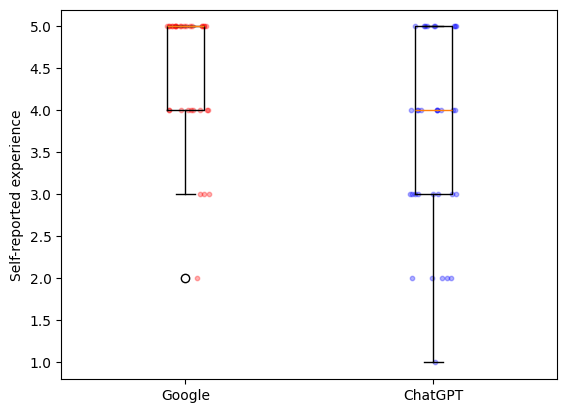

In [46]:
# make boxplot over experience
import random
# make box plot
positions = [1, 2]
plt.boxplot([df["Experience_google"], df["Experience_chatgpt"]], tick_labels=["Google", "ChatGPT"])
plt.ylabel("Self-reported experience")
#plt.title("Total don't knows for Google and ChatGPT")
datapoints_google_jitter = [positions[0]]*len(df["Experience_google"])
datapoints_google_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_google_jitter]

datapoints_gpt_jitter = [positions[1]]*len(df["Experience_chatgpt"])
datapoints_gpt_jitter = [x + random.uniform(-0.1, 0.1) for x in datapoints_gpt_jitter]
plt.scatter(datapoints_google_jitter, df["Experience_google"], alpha=0.3,s = 10, color='r', label='N =' + str(len(df["Experience_google"])))
plt.scatter(datapoints_gpt_jitter, df["Experience_chatgpt"], alpha=0.3, s=10, color='b', label='N = '+ str(len(df["Experience_chatgpt"])))
plt.savefig("figs/tool_experience_boxplot.pdf")
plt.show()

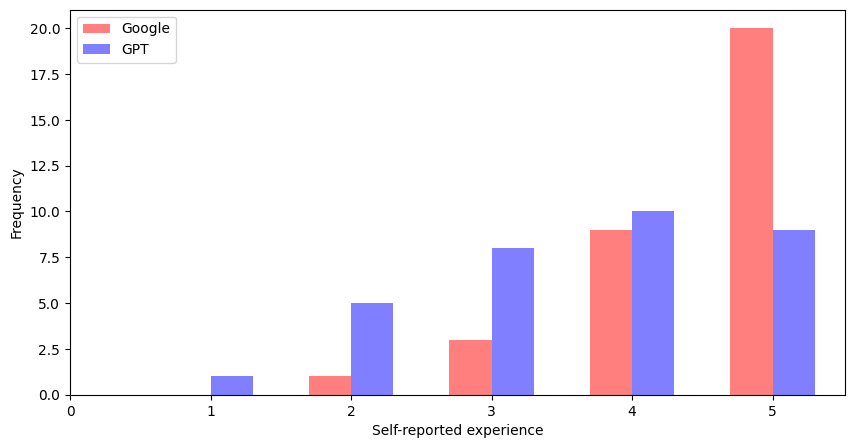

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_google and df_gpt are defined and contain a column "Total"
fig, ax = plt.subplots(figsize=(10, 5))

# Get value counts and sort by index
google_counts = df["Experience_google"].value_counts().sort_index()
gpt_counts = df["Experience_chatgpt"].value_counts().sort_index()

# Define x positions for the bars
x_positions = google_counts.index
x_positions1 = gpt_counts.index

# Plot bars for Google and GPT, with slight adjustments to avoid overlap
ax.bar(x_positions - 0.15, google_counts, label="Google", width=0.3, color='red', alpha=0.5)
ax.bar(x_positions1 + 0.15, gpt_counts, label="GPT", width=0.3, color='blue', alpha=0.5)

# Set x-axis ticks and labels
ax.set_xticks(np.arange(0, 6))
ax.set_xlabel("Self-reported experience")
ax.set_ylabel("Frequency")
ax.legend()

# Save the figure and show it
plt.savefig("figs/experience_rating.pdf", bbox_inches='tight')
plt.show()

In [49]:
df_google = df[df['What tool did we provide you with?'] == 'Google']
df_chatgpt = df[df['What tool did we provide you with?'] == 'ChatGPT']

In [50]:
summary_google = df_google.describe()
summary_chatgpt = df_chatgpt.describe()

display(summary_google)
display(summary_chatgpt)

,What is your age?,Experience_google,Experience_chatgpt
count,17.000000,17.000000,17.000000
mean,23.176471,4.588235,3.529412
std,2.297697,0.712287,0.943242
min,20.000000,3.000000,2.000000
25%,22.000000,4.000000,3.000000
50%,23.000000,5.000000,3.000000
75%,24.000000,5.000000,4.000000
max,28.000000,5.000000,5.000000


,What is your age?,Experience_google,Experience_chatgpt
count,16.000000,16.000000,16.000000
mean,24.625000,4.312500,3.750000
std,1.821172,0.873212,1.341641
min,22.000000,2.000000,1.000000
25%,24.000000,4.000000,2.750000
50%,24.000000,4.500000,4.000000
75%,26.000000,5.000000,5.000000
max,29.000000,5.000000,5.000000
